<a href="https://colab.research.google.com/github/cagutierrezgu/My_Portfolio/blob/main/Podcast%20topic%20classification/Models/Topics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Topic models

#### Latent Semantic Analysis

Además de los modelos de agrupamiento, al estudiarse datos sin etiquetas los modelos de tópicos son de gran importancia, así pueden descubrirse temas ocultos dentro de textos que en principio estaban catalogados como de un solo tema en específico. Uno de los modelos a utilizar sobre el conjunto de datos es el *Latent Semantic Analysis* (LSA), para lo cual usamos **`sklearn.decomposition.TruncatedSVD`**:

In [ ]:
svd_model = TruncatedSVD(
        n_components=10,
        algorithm='randomized',
        n_iter=100,
        random_state=0
        )
svd_model.fit(X_tfidf)

TruncatedSVD(n_components=10, n_iter=100, random_state=0)

In [ ]:
terms_lsa = tfidf.get_feature_names()
for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms_lsa, comp)
    sorted_terms = sorted(
            terms_comp,
            key= lambda x:x[1],
            reverse=True
            )[:15]
    # Se imprimen los términos más importantes de cada tópico
    print(
            "Tópico {}: {}".format(
                i, " ".join(
                    list(
                        map(
                            lambda x:x[0], sorted_terms
                            )
                        )
                    )
                )
            )

Tópico 0: radio fucking murder mike space movie food police sport public named mother died chris fuck
Tópico 1: youtube intelligence data fundamental physic perspective versus goal artificial aspect universe scale dial mindset useful
Tópico 2: espn mike chris billy football sport quarterback cody greg draft bowl miami playoff pirate player
Tópico 3: dial wake instagram mentor mindset goal grow fucking shower essful mission fear youtube negative happiness
Tópico 4: radio production missed dial included join visit museum mentor continued william century died various north
Tópico 5: freedom trump civil violence election politics president political vote constitution government police speech leader united
Tópico 6: quarterback draft brady playoff bowl football player season coach yard zone aaron jordan round ball
Tópico 7: wake grateful drink coffee artificial guest intelligence food science quarterback green negative seriously sleep playoff
Tópico 8: shower cold food focus eating january 

C:\Users\hurom\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Los anteriores son los términos más importantes dentro de cada tópico que encontro el modelo de *LSA*, dentro de los cuales hay algunos con una temática evidente, por ejemplos los tópicos 1 y 2 corresponden a ciencia-tecnología y deportes respectivamente. Sin embargo, hay otros con temáticas muy generales, como lo son el tópico 7.

Así mismo, es posible observar cuáles tópicos son predominantes en algún episodio específico de un podcast, como se muestra en la siguiente figura:

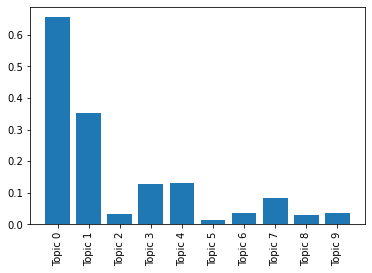

In [ ]:
X_topics_lsa = svd_model.transform(X_tfidf)
fig, ax = plt.subplots()
ax.bar([f"Topic {i}" for i in range(10)], np.abs(X_topics_lsa[0]))
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

De manera general, puede calcularse un promedio de la importancia de cada tópico en cada uno de los podcasts y visualizarlo como se hizo en el caso específico anterior, luego:

In [ ]:
def mean_per_podcast(topics):
    topic = []
    science = []
    sports = []
    hf = []
    history = []
    crime = []
    for i in range(10):
        topic.append([j[i] for j in topics])
        science.append(np.mean(topic[i][:60]))
        sports.append(np.mean(topic[i][60:120]))
        hf.append(np.mean(topic[i][120:180]))
        history.append(np.mean(topic[i][180:240]))
        crime.append(np.mean(topic[i][240:300]))
    return science, sports, hf, history, crime

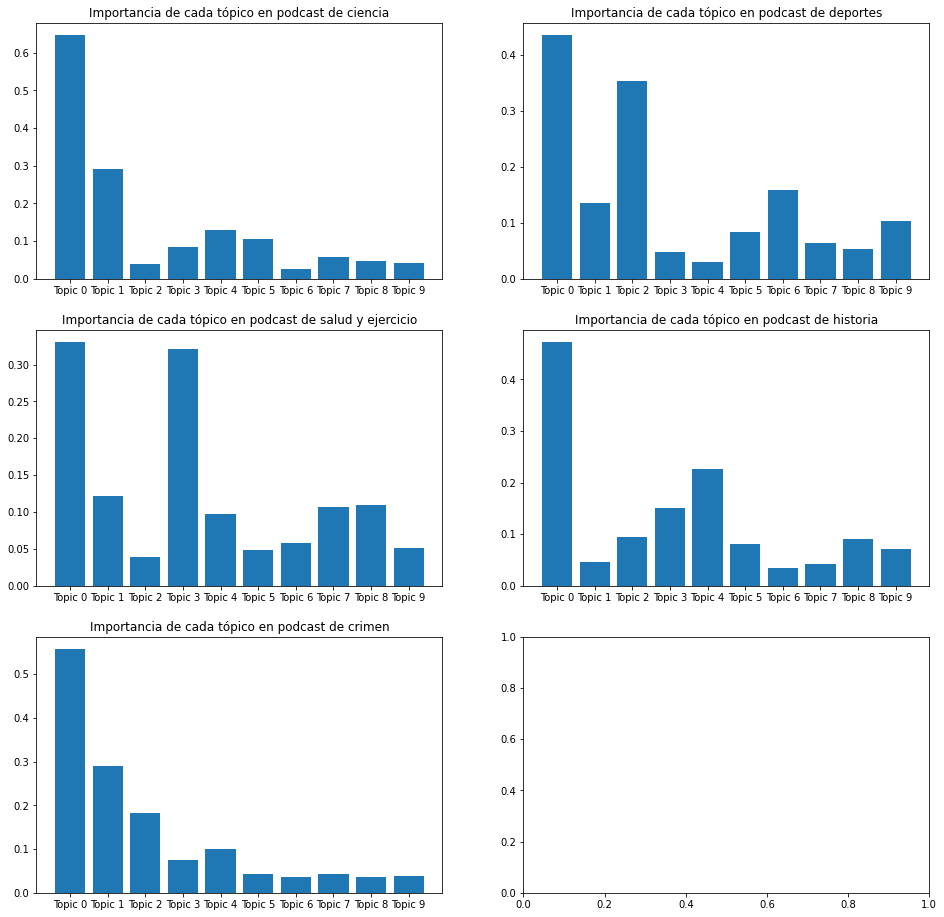

In [ ]:
science, sports, hf, history, crime = mean_per_podcast(np.abs(X_topics_lsa))

fig1, ax = plt.subplots(3, 2, figsize=(16,16))
ax[0][0].bar([f"Topic {i}" for i in range(10)], science)
ax[0][1].bar([f"Topic {i}" for i in range(10)], sports)
ax[1][0].bar([f"Topic {i}" for i in range(10)], hf)
ax[1][1].bar([f"Topic {i}" for i in range(10)], history)
ax[2][0].bar([f"Topic {i}" for i in range(10)], crime)
ax[0][0].set_title('Importancia de cada tópico en podcast de ciencia');
ax[0][1].set_title('Importancia de cada tópico en podcast de deportes');
ax[1][0].set_title('Importancia de cada tópico en podcast de salud y ejercicio');
ax[1][1].set_title('Importancia de cada tópico en podcast de historia');
ax[2][0].set_title('Importancia de cada tópico en podcast de crimen');

Aparentemente el tópico 0 es el más importante en todos los podcasts estudiados, lo que resulta un comportamiento extraño luego de haber visto modelos de agrupamiento que dejaban ver claras diferencias entre cada uno de estos. Veamos ahora otro de los modelos de tópicos más usados.

#### Latent Dirichlet Allocation

Conocido por sus siglas "LDA", este modelo también genera el número de tópicos que uno indique sobre el texto proporcionado. Para esto, utilizaremos **`gensim.models.LdaMulticore`**:

In [ ]:
# Definición del diccionario y corpus para entrenar el modelo
id2word = corpora.Dictionary(text)
corpus = [id2word.doc2bow(i) for i in text]

In [ ]:
lda = gensim.models.LdaMulticore(corpus=corpus,
                                 id2word=id2word,
                                 num_topics=10, 
                                 random_state=100,
                                 passes=10,
                                 per_word_topics=True)

In [ ]:
pprint(lda.print_topics())

[(0,
  '0.008*"also" + 0.008*"people" + 0.007*"like" + 0.007*"really" + '
  '0.006*"time" + 0.005*"would" + 0.005*"podcast" + 0.004*"year" + '
  '0.004*"radio" + 0.004*"history"'),
 (1,
  '0.037*"like" + 0.015*"know" + 0.014*"yeah" + 0.010*"right" + 0.009*"going" '
  '+ 0.007*"think" + 0.007*"that" + 0.006*"thing" + 0.006*"time" + '
  '0.006*"people"'),
 (2,
  '0.022*"going" + 0.020*"like" + 0.019*"know" + 0.018*"want" + 0.016*"thing" '
  '+ 0.014*"people" + 0.013*"right" + 0.011*"life" + 0.010*"make" + '
  '0.008*"time"'),
 (3,
  '0.016*"know" + 0.012*"like" + 0.009*"protein" + 0.006*"also" + '
  '0.006*"knitting" + 0.005*"waffle" + 0.005*"right" + 0.005*"really" + '
  '0.004*"would" + 0.004*"jewish"'),
 (4,
  '0.013*"like" + 0.011*"people" + 0.011*"know" + 0.010*"going" + '
  '0.008*"right" + 0.008*"think" + 0.007*"want" + 0.007*"would" + '
  '0.006*"thing" + 0.005*"time"'),
 (5,
  '0.013*"know" + 0.012*"basically" + 0.009*"like" + 0.007*"gene" + '
  '0.006*"sort" + 0.006*"test" + 0.

A continuación se presentarán diferentes métricas para evaluar los modelos implementados.